In [74]:
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [73]:
def display_bitmap(data, x, y):
    pixels = np.zeros((y, x, 3)) + 255
    
    for px in range(len(data)):
        if data[px] == -1:
            pixels[(int)(px / x), px % x, :] = 255
        else:
            pixels[(int)(px / x), px % x, :] = 0
            
    plt.figure(1)
    plt.imshow(np.array(pixels, dtype=np.uint8))
    plt.show()

In [231]:
class LearningRule(Enum):
    Hebb = 1
    Oja = 2,

class SimulationType(Enum):
    Sync = 1
    Async = 2,

class HopfieldNetwork:
    
    def __init__(self, X, Y, learning_rule, oja_iterations = 100, learning_rate = 0.001) -> None:
        self.X = X
        self.Y = Y
        self.num_neurons = X * Y
        self.learning_rule = learning_rule
        self.oja_iterations = oja_iterations
        self.learning_rate = learning_rate
        self.energy_values = []
        
        pass
    
    def train_heb(self, train_data):
        self.weights = np.dot(train_data.T, train_data) / self.num_neurons      
        pass
    
    def train_oja(self, train_data):
        self.train_heb(train_data)
        
        for i in range(self.oja_iterations):
            y = self.sync_update(train_data)
            self.weights += self.learning_rate * np.dot(y.T, train_data - np.dot(y, self.weights))
        
        pass
    
    def train(self, train_data):        
        if self.learning_rule == LearningRule.Hebb:
            self.train_heb(train_data)
        else:
            self.train_oja(train_data)
        
        np.fill_diagonal(self.weights, 0)
        
        self.print_weights()
        pass
    
    def sync_update(self, data):
        return np.sign(np.dot(data, self.weights))
    
    def async_update(self, data):
        new_data = self.sync_update(data)
        
        same = new_data == data
        if same.all():
            return new_data
        else:
            not_same_idx = np.argwhere(same == False)
            updateIdx = np.random.choice(not_same_idx.reshape(-1))
            data[updateIdx] = new_data[updateIdx]
            return data
        
        
    def restore(self, data, simulation_type, epochs, displayBitmapInIterations = False):
    
        display_bitmap(data, self.X, self.Y)
        
        for epoch in range(epochs):        
            if displayBitmapInIterations:
                display_bitmap(data, self.X, self.Y)
            
            self.energy(data)

            
            if simulation_type == SimulationType.Async:
                data = self.async_update(data)  
            else:
                data = self.sync_update(data)
        
        
        display_bitmap(data, self.X, self.Y)
        self.plot_energy()
        return data
    
    
    def energy(self, data):
        self.energy_values.append(-0.5 * np.dot(np.dot(data, self.weights), data))
        
    def plot_energy(self):
        plt.figure(1)
        plt.clf()
        plt.plot(self.energy_values)
        plt.show()
    
    def print_weights(self):
        plt.figure(1)
        plt.clf()
        colors = plt.imshow(self.weights, cmap=cm.coolwarm)
        plt.colorbar(colors)
        plt.show()

In [76]:
def add_noise(data, noise_count):
    change = np.random.choice(range(len(data)), noise_count)
    noised = np.copy(data)
    noised[change] *= -1
    return noised

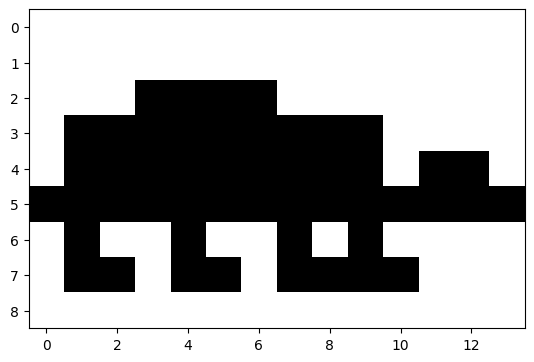

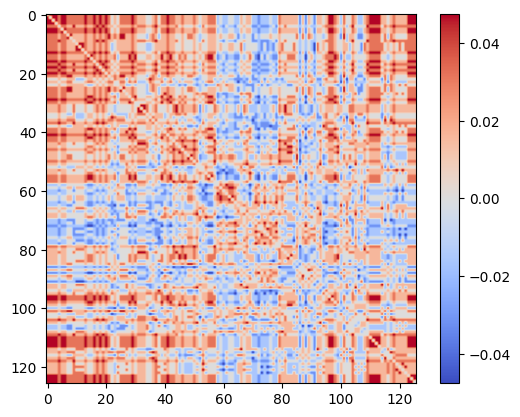

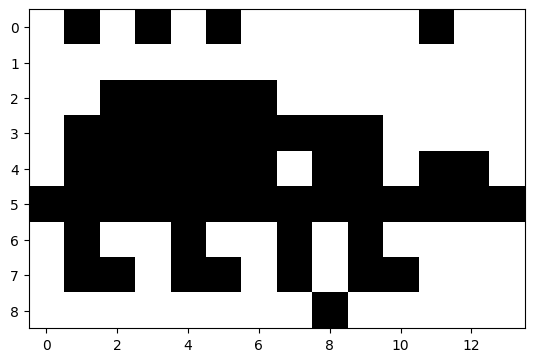

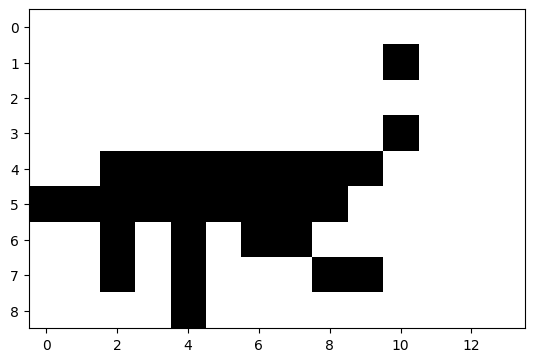

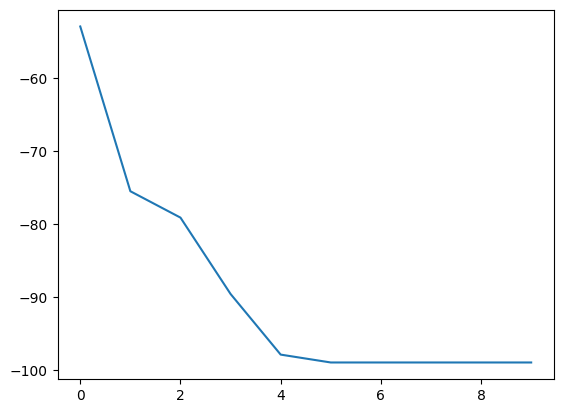

False

In [238]:
import numpy as np
import pandas as pd

X = 14
Y = 9

data = pd.read_csv("data/animals-14x9.csv", sep=",", header=None)
data = np.array(data)

display_bitmap(data[0, :], X, Y)

hp = HopfieldNetwork(X, Y, LearningRule.Hebb)

hp.train(data)

to_restore = add_noise(data[0, :], 10)
restored = hp.restore(to_restore, SimulationType.Sync, 10)
(restored == data[0, :]).all()



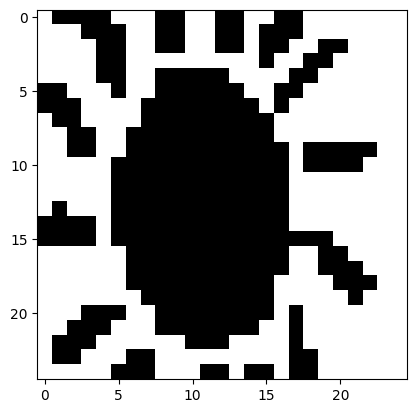

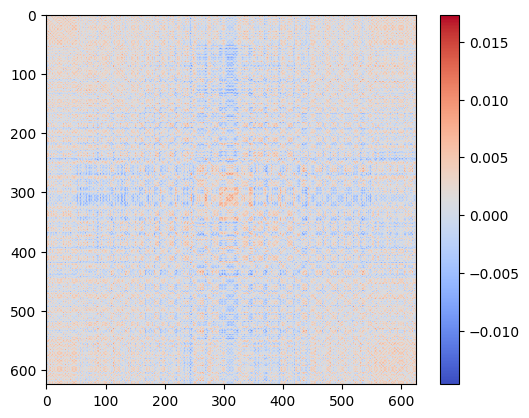

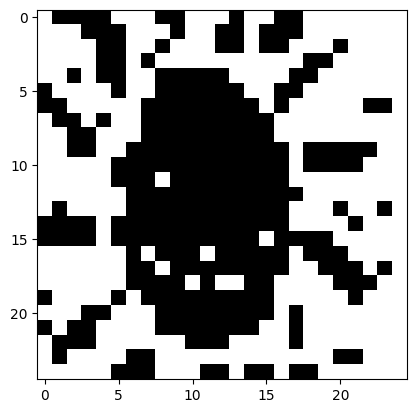

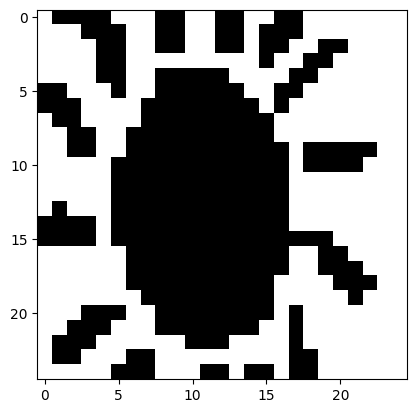

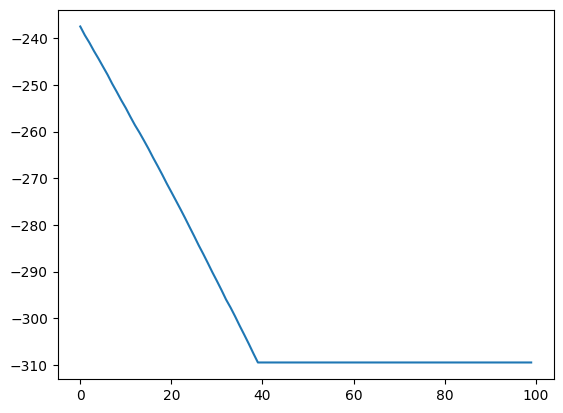

True

In [239]:
import numpy as np
import pandas as pd

X = 25
Y = 25

data = pd.read_csv("data/large-25x25.csv", sep=",", header=None)
data = np.array(data)

display_bitmap(data[0, :], X, Y)

hp = HopfieldNetwork(X, Y, LearningRule.Oja, 100)

hp.train(data)

to_restore = add_noise(data[0, :], 40)
restored = hp.restore(to_restore, SimulationType.Async, 100)
(data[0, :] == restored).all()